In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
import numpy as np
import matplotlib.pyplot as plt
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.inspection import permutation_importance
import xgboost as xgb
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [87]:
import pandas as pd
df = pd.read_csv(r"C:\Users\asus\Music\Hello_World.csv")
df

,age,gender,education_level,employment_status,monthly_income,credit_utilization_ratio,total_credit_limit,late_payments_6m,transaction_frequency,average_transaction_amount,login_frequency,credit_score_checks,luxury_purchase_ratio,savings_rate,debt_to_income,credit_score
0,40,Male,Bachelor,Unemployed,3075.71,43.882667,12288.470646,5,32,122.927413,13,0,0.279732,0.321871,0.876984,1
1,36,Female,Master,Employed,4224.22,6.276654,11669.772882,4,30,253.398786,11,1,0.624207,0.088496,0.613725,1
2,43,Male,Bachelor,Employed,4037.93,5.464899,16257.911561,2,28,160.690043,14,2,0.153837,0.135432,0.556809,0
3,52,Female,High School,Self-Employed,3257.82,37.897596,15172.362148,3,28,76.059006,19,7,0.200288,0.335633,0.327865,0
4,35,Male,PhD,Employed,4063.68,16.172157,19469.636474,1,54,156.283499,11,2,0.065791,0.281460,0.604514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35,Male,High School,Self-Employed,5692.00,19.248471,22059.799510,1,27,89.745581,12,6,0.033139,0.177800,0.248493,0
49996,36,Female,Bachelor,Employed,5576.83,56.573087,11923.194954,1,43,127.594879,19,2,0.196269,0.146693,0.604514,0
49997,40,Male,Bachelor,Unemployed,4326.97,20.753516,9941.729735,2,36,90.369409,16,3,0.104400,0.259277,0.449366,0
49998,37,Female,Bachelor,Self-Employed,6000.00,44.376491,27748.132322,2,25,131.025516,17,2,0.306811,0.053442,1.285028,0


In [88]:
df.dtypes # to check data type of all the columns

age                             int64
gender                         object
education_level                object
employment_status              object
monthly_income                float64
credit_utilization_ratio      float64
total_credit_limit            float64
late_payments_6m                int64
transaction_frequency           int64
average_transaction_amount    float64
login_frequency                 int64
credit_score_checks             int64
luxury_purchase_ratio         float64
savings_rate                  float64
debt_to_income                float64
credit_score                    int64
dtype: object

In [64]:
# from sklearn.preprocessing import LabelEncoder

# # Categorical columns to encode
# categorical_cols = ['gender', 'education_level', 'employment_status']

# # Dictionary to store mappings
# label_mappings = {}

# # Apply LabelEncoder with mapping
# for col in categorical_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col].astype(str))  # Ensure string type
#     label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Save mapping

# # Print the mappings
# for col, mapping in label_mappings.items():
#     print(f"{col} mapping: {mapping}")


In [89]:
df

,age,gender,education_level,employment_status,monthly_income,credit_utilization_ratio,total_credit_limit,late_payments_6m,transaction_frequency,average_transaction_amount,login_frequency,credit_score_checks,luxury_purchase_ratio,savings_rate,debt_to_income,credit_score
0,40,Male,Bachelor,Unemployed,3075.71,43.882667,12288.470646,5,32,122.927413,13,0,0.279732,0.321871,0.876984,1
1,36,Female,Master,Employed,4224.22,6.276654,11669.772882,4,30,253.398786,11,1,0.624207,0.088496,0.613725,1
2,43,Male,Bachelor,Employed,4037.93,5.464899,16257.911561,2,28,160.690043,14,2,0.153837,0.135432,0.556809,0
3,52,Female,High School,Self-Employed,3257.82,37.897596,15172.362148,3,28,76.059006,19,7,0.200288,0.335633,0.327865,0
4,35,Male,PhD,Employed,4063.68,16.172157,19469.636474,1,54,156.283499,11,2,0.065791,0.281460,0.604514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35,Male,High School,Self-Employed,5692.00,19.248471,22059.799510,1,27,89.745581,12,6,0.033139,0.177800,0.248493,0
49996,36,Female,Bachelor,Employed,5576.83,56.573087,11923.194954,1,43,127.594879,19,2,0.196269,0.146693,0.604514,0
49997,40,Male,Bachelor,Unemployed,4326.97,20.753516,9941.729735,2,36,90.369409,16,3,0.104400,0.259277,0.449366,0
49998,37,Female,Bachelor,Self-Employed,6000.00,44.376491,27748.132322,2,25,131.025516,17,2,0.306811,0.053442,1.285028,0


In [90]:
df.isnull().sum()

age                           0
gender                        0
education_level               0
employment_status             0
monthly_income                0
credit_utilization_ratio      0
total_credit_limit            0
late_payments_6m              0
transaction_frequency         0
average_transaction_amount    0
login_frequency               0
credit_score_checks           0
luxury_purchase_ratio         0
savings_rate                  0
debt_to_income                0
credit_score                  0
dtype: int64

In [91]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=['gender', 'education_level', 'employment_status'], drop_first=True)

X = df_encoded.drop('credit_score', axis=1)
y = df_encoded['credit_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [92]:
import pickle
with open("credit_columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)

In [93]:
print(X_train.columns.tolist())

['age', 'monthly_income', 'credit_utilization_ratio', 'total_credit_limit', 'late_payments_6m', 'transaction_frequency', 'average_transaction_amount', 'login_frequency', 'credit_score_checks', 'luxury_purchase_ratio', 'savings_rate', 'debt_to_income', 'gender_Male', 'gender_Other', 'education_level_High School', 'education_level_Master', 'education_level_PhD', 'employment_status_Retired', 'employment_status_Self-Employed', 'employment_status_Unemployed']


In [94]:
df

,age,gender,education_level,employment_status,monthly_income,credit_utilization_ratio,total_credit_limit,late_payments_6m,transaction_frequency,average_transaction_amount,login_frequency,credit_score_checks,luxury_purchase_ratio,savings_rate,debt_to_income,credit_score
0,40,Male,Bachelor,Unemployed,3075.71,43.882667,12288.470646,5,32,122.927413,13,0,0.279732,0.321871,0.876984,1
1,36,Female,Master,Employed,4224.22,6.276654,11669.772882,4,30,253.398786,11,1,0.624207,0.088496,0.613725,1
2,43,Male,Bachelor,Employed,4037.93,5.464899,16257.911561,2,28,160.690043,14,2,0.153837,0.135432,0.556809,0
3,52,Female,High School,Self-Employed,3257.82,37.897596,15172.362148,3,28,76.059006,19,7,0.200288,0.335633,0.327865,0
4,35,Male,PhD,Employed,4063.68,16.172157,19469.636474,1,54,156.283499,11,2,0.065791,0.281460,0.604514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35,Male,High School,Self-Employed,5692.00,19.248471,22059.799510,1,27,89.745581,12,6,0.033139,0.177800,0.248493,0
49996,36,Female,Bachelor,Employed,5576.83,56.573087,11923.194954,1,43,127.594879,19,2,0.196269,0.146693,0.604514,0
49997,40,Male,Bachelor,Unemployed,4326.97,20.753516,9941.729735,2,36,90.369409,16,3,0.104400,0.259277,0.449366,0
49998,37,Female,Bachelor,Self-Employed,6000.00,44.376491,27748.132322,2,25,131.025516,17,2,0.306811,0.053442,1.285028,0


In [95]:
# pip show numpy scikit-learn joblib


In [96]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
df

,age,gender,education_level,employment_status,monthly_income,credit_utilization_ratio,total_credit_limit,late_payments_6m,transaction_frequency,average_transaction_amount,login_frequency,credit_score_checks,luxury_purchase_ratio,savings_rate,debt_to_income,credit_score
0,40,Male,Bachelor,Unemployed,3075.71,43.882667,12288.470646,5,32,122.927413,13,0,0.279732,0.321871,0.876984,1
1,36,Female,Master,Employed,4224.22,6.276654,11669.772882,4,30,253.398786,11,1,0.624207,0.088496,0.613725,1
2,43,Male,Bachelor,Employed,4037.93,5.464899,16257.911561,2,28,160.690043,14,2,0.153837,0.135432,0.556809,0
3,52,Female,High School,Self-Employed,3257.82,37.897596,15172.362148,3,28,76.059006,19,7,0.200288,0.335633,0.327865,0
4,35,Male,PhD,Employed,4063.68,16.172157,19469.636474,1,54,156.283499,11,2,0.065791,0.281460,0.604514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35,Male,High School,Self-Employed,5692.00,19.248471,22059.799510,1,27,89.745581,12,6,0.033139,0.177800,0.248493,0
49996,36,Female,Bachelor,Employed,5576.83,56.573087,11923.194954,1,43,127.594879,19,2,0.196269,0.146693,0.604514,0
49997,40,Male,Bachelor,Unemployed,4326.97,20.753516,9941.729735,2,36,90.369409,16,3,0.104400,0.259277,0.449366,0
49998,37,Female,Bachelor,Self-Employed,6000.00,44.376491,27748.132322,2,25,131.025516,17,2,0.306811,0.053442,1.285028,0


In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)  # Probabilities for ROC-AUC


In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("🎯 Precision:", precision_score(y_test, y_pred, average='macro'))
print("📈 Recall:", recall_score(y_test, y_pred, average='macro'))
print("📊 F1 Score:", f1_score(y_test, y_pred, average='macro'))

print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8727
🎯 Precision: 0.8030352704409471
📈 Recall: 0.7279090543763828
📊 F1 Score: 0.7560497692964776

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      8192
           1       0.71      0.50      0.59      1808

    accuracy                           0.87     10000
   macro avg       0.80      0.73      0.76     10000
weighted avg       0.86      0.87      0.86     10000



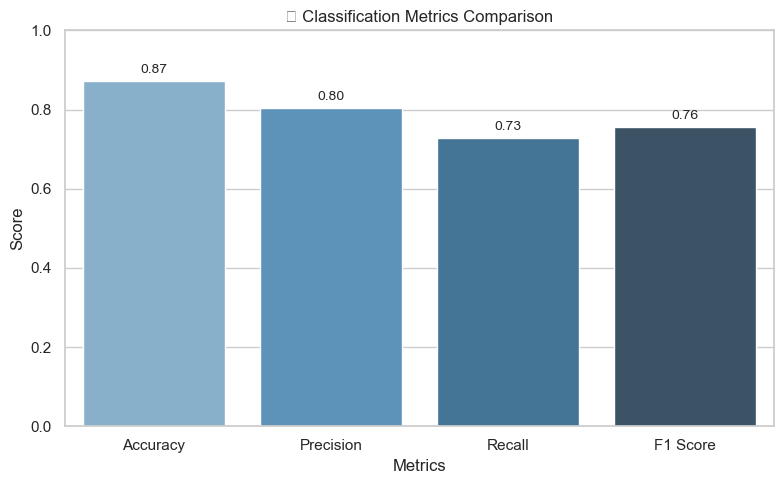

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='Blues_d')
plt.ylim(0, 1)
plt.title('📊 Classification Metrics Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
for index, row in metrics_df.iterrows():
    plt.text(index, row.Score + 0.02, f'{row.Score:.2f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


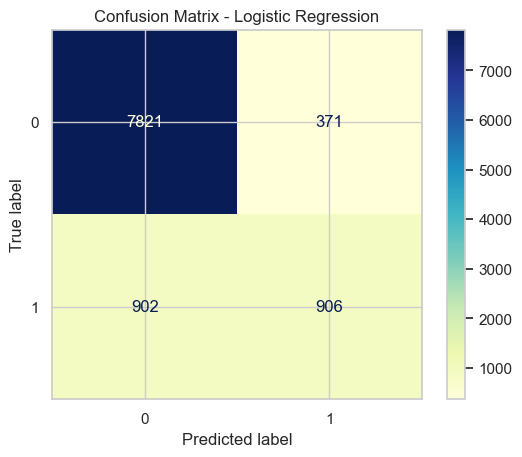

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


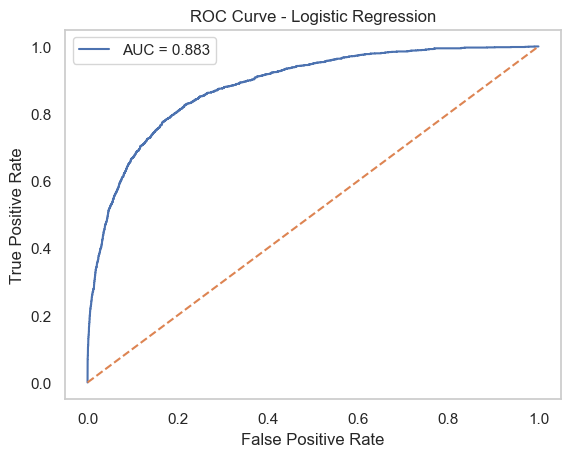

✅ ROC AUC Score: 0.883


In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label='AUC = %.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

print("✅ ROC AUC Score:", round(roc_auc, 3))


In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("📌 Cross-Validation Accuracy Scores:", cv_scores)
print("✅ Mean Accuracy:", cv_scores.mean())



📌 Cross-Validation Accuracy Scores: [0.875  0.8714 0.8743 0.8736 0.8756]
✅ Mean Accuracy: 0.8739800000000001


In [104]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],                  # Regularization type
    'C': [0.1, 1, 10],             # Inverse of regularization strength
    'class_weight': [None, 'balanced']        # Deal with imbalance
}

# GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
# Best model
best_log_model = grid.best_estimator_
# Fit on SMOTE-balanced training data
# Evaluate on test set
y_pred = best_log_model.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


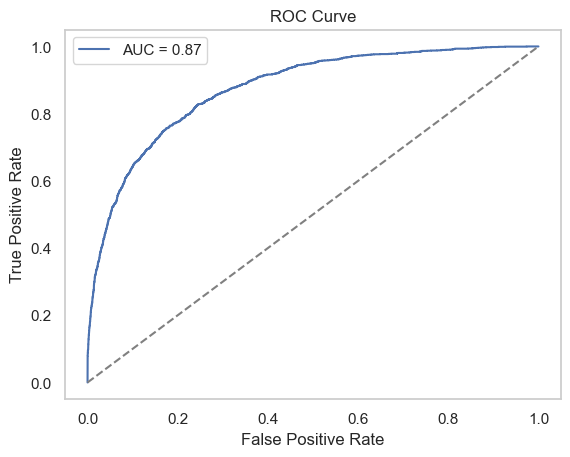

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Best Parameters:", grid.best_params_)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}
🔍 Accuracy: 0.8718

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      8192
           1       0.71      0.50      0.58      1808

    accuracy                           0.87     10000
   macro avg       0.80      0.72      0.75     10000
weighted avg       0.86      0.87      0.86     10000

📉 Confusion Matrix:
 [[7823  369]
 [ 913  895]]


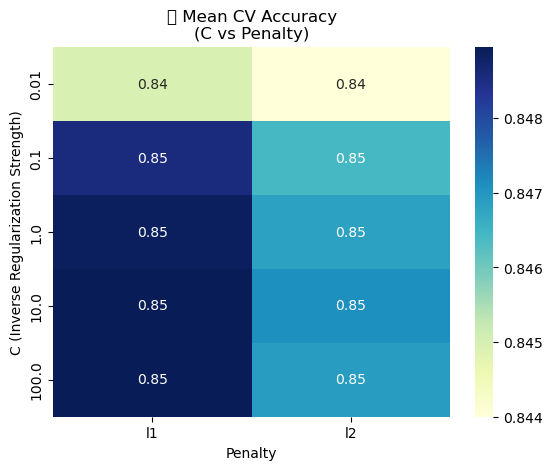

In [48]:
# Convert results to DataFrame
results_df = pd.DataFrame(grid.cv_results_)

# Create a heatmap of accuracy across C and penalty
pivot_table = results_df.pivot_table(
    values='mean_test_score',
    index='param_C',
    columns='param_penalty'
)

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title("🧪 Mean CV Accuracy\n(C vs Penalty)")
plt.xlabel("Penalty")
plt.ylabel("C (Inverse Regularization Strength)")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model, param_distributions=param_grid, 
    scoring='accuracy', cv=5, n_iter=10, n_jobs=-1, verbose=1, random_state=42
)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters: {'C': 100, 'class_weight': None, 'penalty': 'l1'}
🔍 Accuracy: 0.8759

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      8192
           1       0.73      0.50      0.59      1808

    accuracy                           0.88     10000
   macro avg       0.81      0.73      0.76     10000
weighted avg       0.87      0.88      0.87     10000



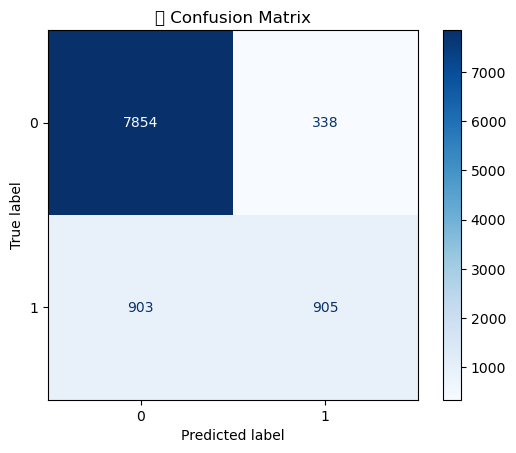

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, ConfusionMatrixDisplay)

# Define Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

# Grid search with cross-validation
grid = GridSearchCV(estimator=log_reg,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=5,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True)

# Fit model on SMOTE-balanced training data
grid.fit(X_train, y_train)

# Get best model and predictions
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation Metrics
print("✅ Best Parameters:", grid.best_params_)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("📉 Confusion Matrix")
plt.show()


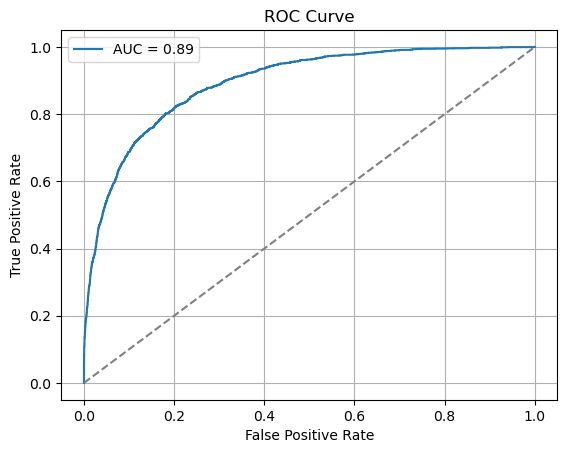

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Would you like to try RandomizedSearchCV, or apply this same approach to other models (like Random Forest, XGBoost)?

In [106]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression:
Accuracy: 0.8727
Confusion Matrix:
 [[7821  371]
 [ 902  906]]


In [79]:
import joblib
joblib.dump(best_model, 'logistic_model.joblib')


['logistic_model.joblib']

In [117]:
from sklearn.model_selection import cross_val_score

# 5-Fold Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("📈 Cross-Validation Scores:", cv_scores)
print("✅ Mean CV Accuracy:", round(cv_scores.mean(), 3))


📈 Cross-Validation Scores: [0.875  0.8714 0.8743 0.8736 0.8756]
✅ Mean CV Accuracy: 0.874


In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Optional: use a pipeline with scaling
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='liblinear'))

# Accuracy
accuracy = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print("✅ Accuracy (CV):", accuracy)
print("Mean Accuracy:", accuracy.mean())

# Precision
precision = cross_val_score(logreg, X, y, cv=5, scoring='precision_macro')
print("\n🎯 Precision (CV):", precision)
print("Mean Precision:", precision.mean())

# Recall
recall = cross_val_score(logreg, X, y, cv=5, scoring='recall_macro')
print("\n📈 Recall (CV):", recall)
print("Mean Recall:", recall.mean())

# F1 Score
f1 = cross_val_score(logreg, X, y, cv=5, scoring='f1_macro')
print("\n📊 F1 Score (CV):", f1)
print("Mean F1 Score:", f1.mean())


✅ Accuracy (CV): [0.8774 0.8725 0.8791 0.8785 0.8804]
Mean Accuracy: 0.87758

🎯 Precision (CV): [0.81909948 0.8056582  0.82416807 0.82206829 0.82550092]
Mean Precision: 0.8192989911382975

📈 Recall (CV): [0.73744892 0.73360562 0.7384911  0.73854296 0.74285543]
Mean Recall: 0.7381888052818202

📊 F1 Score (CV): [0.76769575 0.7609559  0.76989696 0.76935938 0.77361595]
Mean F1 Score: 0.7683047873899053


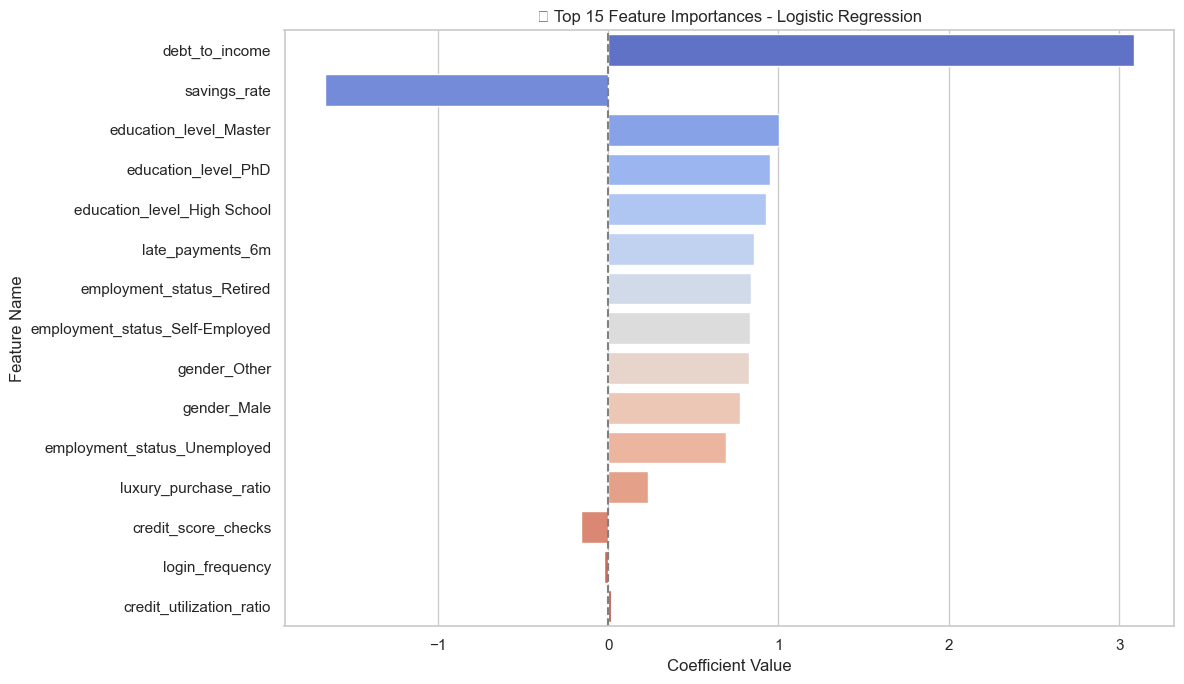

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names (columns used in training)
feature_names = X_train.columns

# Get the model coefficients
coefficients = best_model.coef_[0]  # for multiclass, use coef_[class_index]

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort by absolute importance
importance_df['AbsImportance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='AbsImportance', ascending=False)

# 📊 Plotting
plt.figure(figsize=(12, 7))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='coolwarm')
plt.title("🔍 Top 15 Feature Importances - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


### After SMote


In [108]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Original class distribution:
 credit_score
0    32624
1     7376
Name: count, dtype: int64
After SMOTE:
 credit_score
1    32624
0    32624
Name: count, dtype: int64
Accuracy: 0.8148
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      8156
           1       0.50      0.75      0.60      1844

    accuracy                           0.81     10000
   macro avg       0.72      0.79      0.74     10000
weighted avg       0.85      0.81      0.83     10000

Confusion Matrix:
 [[6774 1382]
 [ 470 1374]]


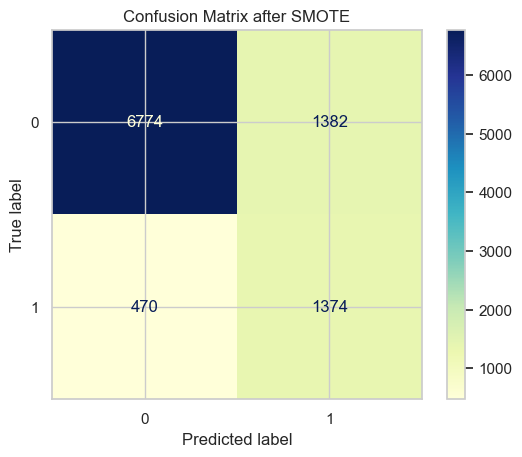

In [109]:
# Features and target
X = df_encoded.drop('credit_score', axis=1)
y = df_encoded['credit_score']

# Split data (apply SMOTE only to training set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Optional: Check new class distribution
print("Original class distribution:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_smote).value_counts())


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_smote, y_train_smote)



y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap="YlGnBu")
plt.title("Confusion Matrix after SMOTE")
plt.show()





Hyperparameter Tuning of Logistic Regression using GridSearchCv with SMOTE

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the model
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Define parameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],                  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],             # Inverse of regularization strength
    'class_weight': [None, 'balanced']        # Deal with imbalance
}

# GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                    scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit on SMOTE-balanced training data
grid.fit(X_train_smote, y_train_smote)

# Best model
best_log_model = grid.best_estimator_

# Evaluate on test set
y_pred = best_log_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Best Parameters:", grid.best_params_)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

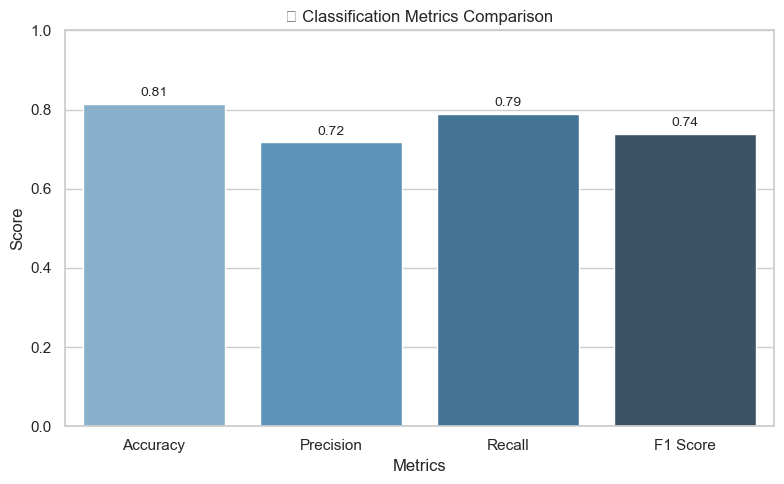

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='Blues_d')
plt.ylim(0, 1)
plt.title('📊 Classification Metrics Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
for index, row in metrics_df.iterrows():
    plt.text(index, row.Score + 0.02, f'{row.Score:.2f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, ConfusionMatrixDisplay)

# Define Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

# Grid search with cross-validation
grid = GridSearchCV(estimator=log_reg,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=5,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True)

# Fit model on SMOTE-balanced training data
grid.fit(X_train_smote, y_train_smote)

# Get best model and predictions
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation Metrics
print("✅ Best Parameters:", grid.best_params_)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("📉 Confusion Matrix")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

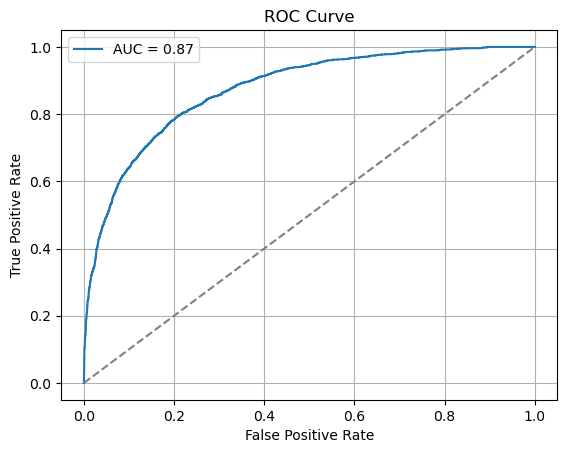

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_reg = lin_reg.predict(X_test)

# If needed, threshold to compare with classification
y_pred_class = (y_pred_reg >= 0.5).astype(int)

print("Linear Regression (forced classification):")
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))


Linear Regression (forced classification):
Accuracy: 0.8708
Confusion Matrix:
 [[7958  234]
 [1058  750]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      8192
           1       0.76      0.41      0.54      1808

    accuracy                           0.87     10000
   macro avg       0.82      0.69      0.73     10000
weighted avg       0.86      0.87      0.85     10000



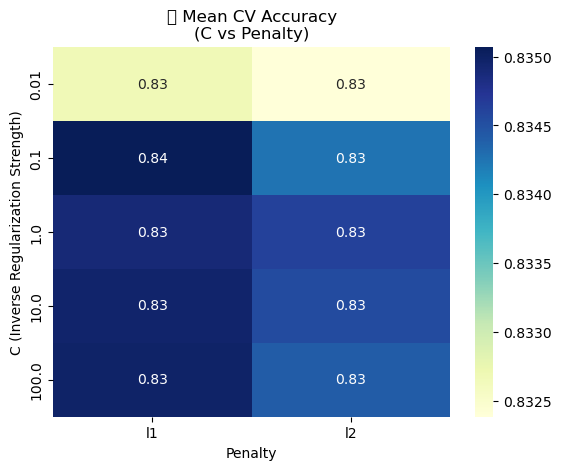

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(grid.cv_results_)

# Create a heatmap of accuracy across C and penalty
pivot_table = results_df.pivot_table(
    values='mean_test_score',
    index='param_C',
    columns='param_penalty'
)

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title("🧪 Mean CV Accuracy\n(C vs Penalty)")
plt.xlabel("Penalty")
plt.ylabel("C (Inverse Regularization Strength)")
plt.show()


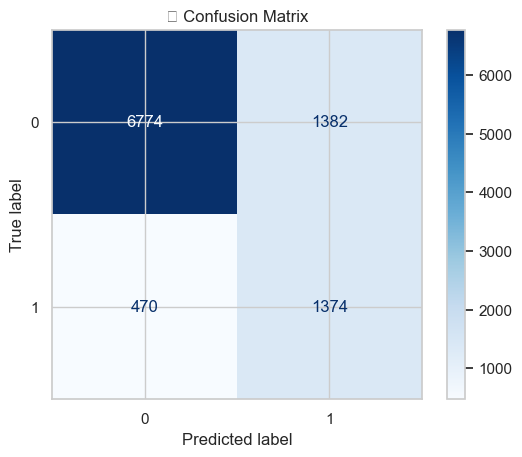

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("🔍 Confusion Matrix")
plt.show()


In [ ]:
# import pandas as pd

# # Prepare the input data (already one-hot encoded and matches training structure)
# new_data = pd.DataFrame([{
#     'age': 40,
#     'monthly_income': 3075.71,
#     'credit_utilization_ratio': 43.88,
#     'total_credit_limit': 12288.47,
#     'late_payments_6m': 5,
#     'transaction_frequency': 32,
#     'average_transaction_amount': 122.92,
#     'login_frequency': 13,
#     'credit_score_checks': 0,
#     'luxury_purchase_ratio': 0.27,
#     'savings_rate': 0.32,
#     'debt_to_income': 0.87,
    
#     # One-hot encoded categorical variables
#     'gender_Male': 1,
#     'gender_Other': 0,
    
#     'education_level_High School': 0,
#     'education_level_Master': 0,
#     'education_level_PhD': 0,
    
#     'employment_status_Retired': 0,
#     'employment_status_Self-Employed': 0,
#     'employment_status_Unemployed': 1
# }])

# # Predict class using the trained logistic regression model
# predicted_class = model.predict(new_data)[0]
# predicted_proba = model.predict_proba(new_data)[0]  # For class probabilities

# # Print results
# print("Predicted Credit Score Class:", predicted_class)
# print("Probability of class 0 (Good Credit):", predicted_proba[0])
# print("Probability of class 1 (Bad Credit):", predicted_proba[1], 2)


Predicted Credit Score Class: 1
Probability of class 0 (Good Credit): 0.1530989317527206
Probability of class 1 (Bad Credit): 0.8469010682472794 2


In [116]:
new_data = pd.DataFrame([{
    'age': 40,
    'monthly_income': 3075.71,
    'credit_utilization_ratio': 43.88,
    'total_credit_limit': 12288.47,
    'late_payments_6m': 5,
    'transaction_frequency': 32,
    'average_transaction_amount': 122.92,
    'login_frequency': 13,
    'credit_score_checks': 0,
    'luxury_purchase_ratio': 0.27,
    'savings_rate': 0.32,
    'debt_to_income': 0.87,
    
    # One-hot encoded categorical values
    'gender_Male': 1,
    'gender_Other': 0,
    
    'education_level_High School': 0,
    'education_level_Master': 0,
    'education_level_PhD': 0,
    
    'employment_status_Retired': 0,
    'employment_status_Self-Employed': 0,
    'employment_status_Unemployed': 1
}])

prediction = model.predict(new_data)
predicted_class = int(round(prediction[0]))
print("Predicted Credit Score:", predicted_class)


Predicted Credit Score: 1
